### Atividade de Avaliação 1 - Big Data

##### Instruções:
* Importar os arquivos disponibilizados no portal utilizando PySpark (customers, products, transactions)
* Atentar para o formato de cada um deles e importar conforme seu tipo
* Adicionar o código correspondente abaixo de cada questão, podem criar quantas células forem necessárias
* Executar o código e exportar o resultado como arquivo ipynb e postar ele no blackboard

+-------------------+--------+---------+-------------------+-------+----------+------+----------+------+----+----+-------+----------+----------+----------+--------+----+-------+---------+-----+--------+---+--------+----------+-------------------+-------------------+--------------------+----------------+-------------+------------+-------------------+---------+------+-------------+
|      data_extracao|predial1|queda_arr|               data|feridos|feridos_gr|mortes|morte_post|fatais|auto|taxi|lotacao|onibus_urb|onibus_met|onibus_int|caminhao|moto|carroca|bicicleta|outro|cont_vit|ups|patinete|idacidente|          longitude|           latitude|                log1|            log2|    tipo_acid|     dia_sem|               hora|noite_dia|regiao|    consorcio|
+-------------------+--------+---------+-------------------+-------+----------+------+----------+------+----+----+-------+----------+----------+----------+--------+----+-------+---------+-----+--------+---+--------+----------+--------

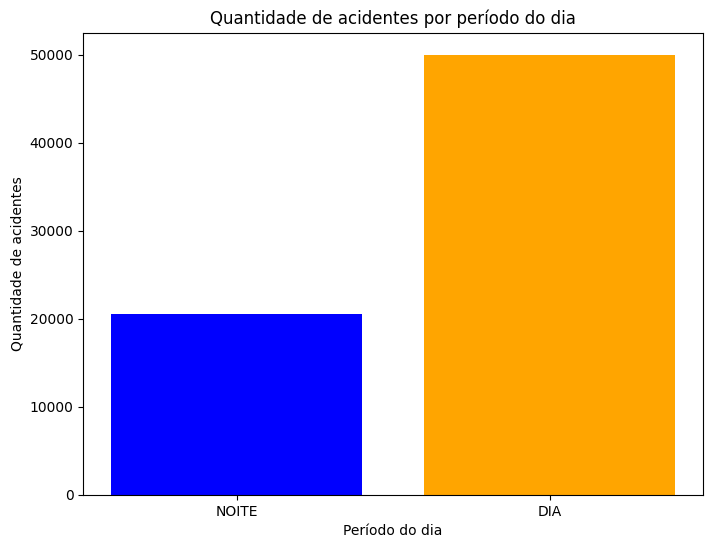

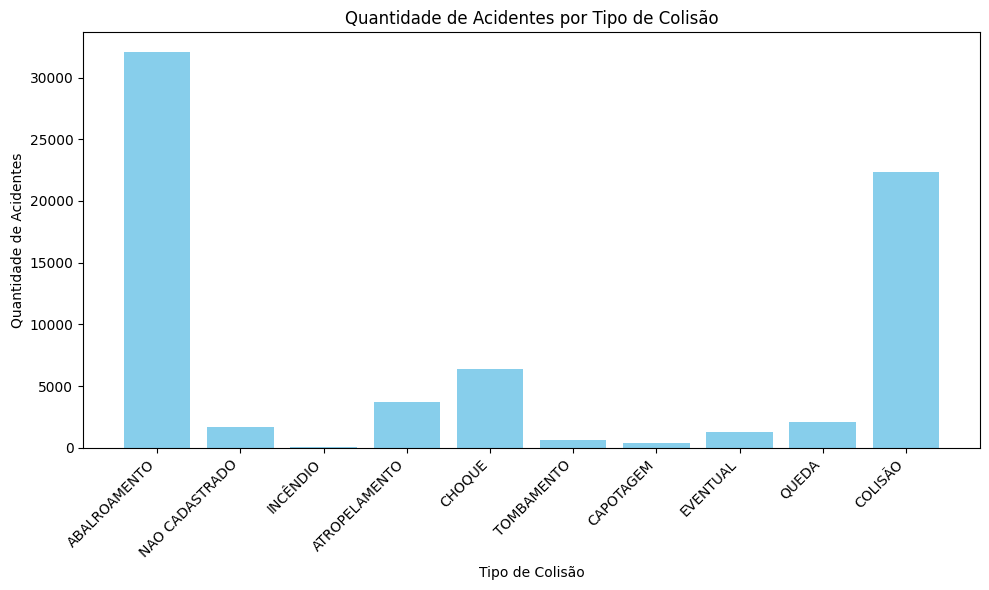

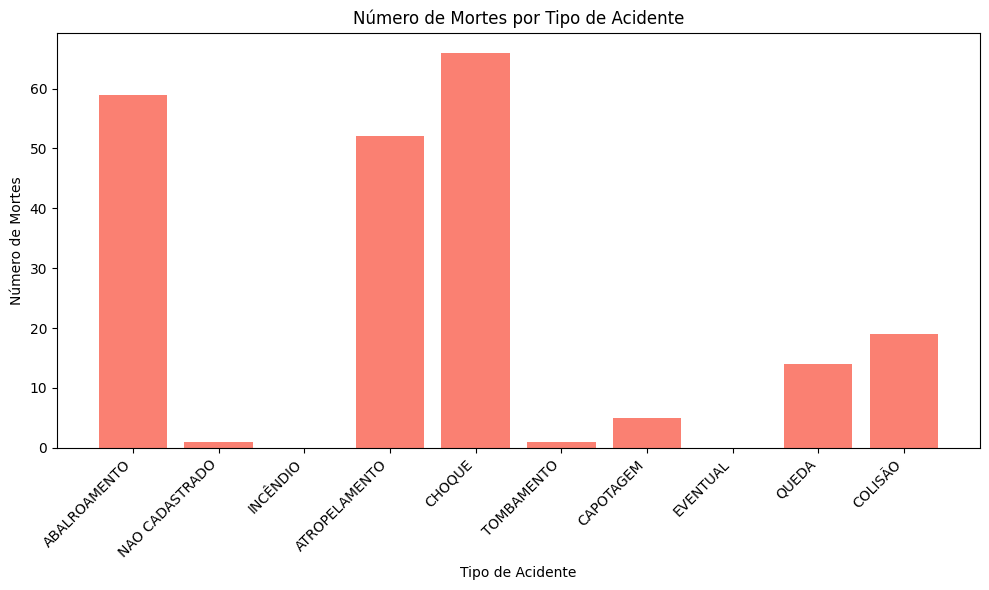

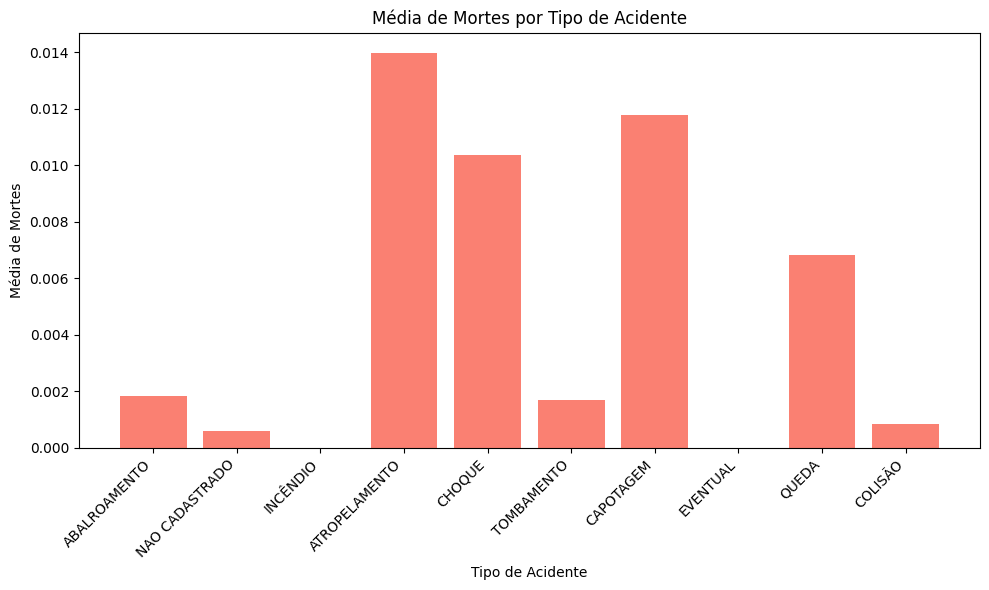

In [32]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Iniciar
spark = SparkSession.builder.appName("AcidentesAnalysis").getOrCreate()

# Carregar o arquivo CSV
file_path = "cat_acidentes.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True, sep=';')
df.show()
#CONTAGEM DE ACIDENTES POR CADA PERÍODO
#Filtrar arquivo CSV pra contagem
dfFilter = df.select("data_extracao", "tipo_acid", "noite_dia")

# Mostrar as primeiras linhas do dataframe para entender a estrutura dos dados
dfFilter.show()

contagem_periodo = df.groupBy("noite_dia").count().toPandas()

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_periodo["noite_dia"], contagem_periodo["count"], color=["blue", "orange"])
plt.xlabel("Período do dia")
plt.ylabel("Quantidade de acidentes")
plt.title("Quantidade de acidentes por período do dia")
plt.show()


#TIPO MAIS COMUM

# Contar o número de acidentes por tipo de colisão
contagem_tipo_colisao = df.groupBy("tipo_acid").count()

# Converter para pandas DataFrame para visualização
contagem_tipo_colisao_pd = contagem_tipo_colisao.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_tipo_colisao_pd["tipo_acid"], contagem_tipo_colisao_pd["count"], color='skyblue')
plt.xlabel("Tipo de Colisão")
plt.ylabel("Quantidade de Acidentes")
plt.title("Quantidade de Acidentes por Tipo de Colisão")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




#NUMERO TOTAL POR TIPO

# Contar o número de mortes por tipo de acidente
contagem_mortes_por_tipo_acidente = df.groupBy("tipo_acid").agg({"mortes": "sum"})

# Converter para pandas DataFrame para visualização
contagem_mortes_pd = contagem_mortes_por_tipo_acidente.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_mortes_pd["tipo_acid"], contagem_mortes_pd["sum(mortes)"], color='salmon')
plt.xlabel("Tipo de Acidente")
plt.ylabel("Número de Mortes")
plt.title("Número de Mortes por Tipo de Acidente")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#MÉDIA POR TIPO
# Calcular a média de mortes por tipo de acidente
media_mortes_por_tipo_acidente = df.groupBy("tipo_acid").agg({"mortes": "avg"})

# Converter para pandas DataFrame para visualização
media_mortes_pd = media_mortes_por_tipo_acidente.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_mortes_pd["tipo_acid"], media_mortes_pd["avg(mortes)"], color='salmon')
plt.xlabel("Tipo de Acidente")
plt.ylabel("Média de Mortes")
plt.title("Média de Mortes por Tipo de Acidente")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 0- Criando a sessão do spark

SyntaxError: invalid syntax (1272971114.py, line 1)

##### 1- Importar os arquivos em dataframes
* customer.json = df_customers
* products.csv = df_products
* transactions.txt = df_transactions

Arquivo CSV convertido e salvo com sucesso.


##### 2- Ajustes nos dataframes
* df_customers
  * Adicionar coluna `full_name` com a concatenação do `first_name` com o `last_name` (não esqueça do espaço entre eles)
  * Remover as colunas `first_name` e `last_name`
  * Criar uma coluna `age_range` com o seguinte formato:
      * Se a idade estiver entre 0 e 29 colocar o valor `-30`
      * Se a idade estiver entre 30 e 60 colocar o valor `30-60`
      * Se a idade for maior que 60 colocar o valor `60+`
* df_transactions
  * Preencher com zero os valores importados em branco da coluna `discount_percent`
* todos os dataframes
  * Ajustar os tipos de dados referentes a cada arquivo importado
  * Exibir o schema de todos os dataframes





##### 3- Operações básicas com dataframes
* Exibir as 5 primeiras linhas para cada dataframe
* Exibir o total de registros de cada dataframe:
  * Usando o comando `print` (ex: `df_1 possui x linhas, df_2 possui y linhas, etc.`)
  * Criando um novo dataframe com uma coluna `filename` do tipo `string` e uma `count` com o total de linhas
* Exibir a mensagem abaixo substituindo as variáveis x, y e z pelo valor correspondente no `df_transactions`
  * `Existem x produtos únicos no df_transactions, sendo o que mais se repete é o product_id y com z ocorrências`
    

##### 4- Operações de join
* Crie um novo dataframe com as informações de transações juntamente com os dados de clientes e produtos
* Crie uma nova coluna `total_price` considerando a quantidade adquirida e o percentual de desconto fornecido


##### 5- Agregações e análises de dados (exibir os dados em dataframes)
* Exibir a quantidade de transações por mês
* Exibir o valor total de vendas (total_price) por mês
* Exibir o valor total de vendas por dia da semana
* Exibir o valor total de vendas por gênero do cliente e faixa de idade (age_range)
* Exibir a média de vendas por dia de semana em cada mês, ordenado pela média decrescente

##### 6- Exportação de dados
* Exportar os dados de vendas, obtido no item 4 no formato `parquet` particionado por `ano`, `mês`, `dia`

##### Desafio: Analisar um arquivo de log de um servidor http
* O arquivo abaixo é um dataset fornecido pela NASA com informações de acesso a um servidor http
* O objetivo da atividade é importar o arquivo no spark e responder as questões:
  * Total de status_codes por host
  * Soma do content_size por dia
  * Total de ocorrências por tipo de status code:
    * 1xx = Informational
    * 2xx = Success
    * 3xx = Redirection
    * 4xx = Client Errors
    * 5xx = Server Errors
* OBS1: não é necessário fazer o download localmente e depois subir no jupyter, basta usar o comando `wget` da célula abaixo
* OBS2: também não é necessário descompactar o 